In [2]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
df = pd.read_csv('/Users/hanjun/Desktop/python/비타민/추천시스템/recommend_result.csv')

## RGB

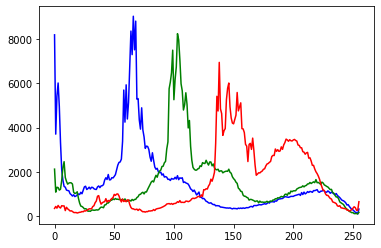

In [132]:
img = cv2.imread('/Users/hanjun/Desktop/python/비타민/추천시스템/전처리완료 데이터/gangwon_203.jpg')

channels = cv2.split(img)
colors = ['b', 'g', 'r']
for ch, color in zip(channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
plt.show()

## 색상 추출

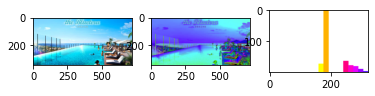

In [4]:
a = cv2.imread('/Users/hanjun/Desktop/python/비타민/추천시스템/중복처리완료_데이터/gangwon_95.jpg')

img=cv2.resize(a,(320,200)) #이미지사이즈 조정

x= 20 #히스토그램 x 값 범위

img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV) #색 추출을위해 이미지 HSV 색상으로 변경

img=cv2.calcHist(img,[0],None,[x],[0,180]) #이미지 히스토그램 계산


imgBuf=np.zeros((x,1,3),dtype="uint8") # 히스토그램 그리기위한 버퍼
imgHistResult = np.zeros((200,320,3),dtype="uint8") #히스토그램을 그릴 이미지배열
imgHistResult.fill(255)
rows,cols, channels = imgHistResult.shape # row,col 값 구하기위함

for i in range(0,x):
    imgBuf[i,0] = ((i*180/x) , 255,255 ) #버퍼에 지정한 x 만큼의 색상정보를 H 에 저장

binW= int(cols/x) #색상 히스토그램 너비값

imgBuf=cv2.cvtColor(imgBuf, cv2.COLOR_HSV2BGR) #HSV 를 BGR로 변환

for i in range(0, x):


    setY = int(img[i,0]*rows/255) #이미지 y값 을위한 변수

    #print(int(imgBuf[i,0][0]),int(imgBuf[i,0][1]),int(imgBuf[i,0][2]))


    cv2.rectangle(imgHistResult, ((i*binW),rows),((i+1)*binW,rows-setY),(int(imgBuf[i,0][0]),int(imgBuf[i,0][1]),int(imgBuf[i,0][2])),-1,8) #히스토그램 색깔별 출력 x에 따라 범위는 다름



plt.subplot(131)
rgb=cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

plt.subplot(132)
hsv=cv2.cvtColor(a,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

plt.subplot(133)
plt.imshow(imgHistResult)
plt.show()

In [5]:
t_list = df[df['base_image']=='gyeongbuk_199']['image_index'].to_list()
t_list = ['gyeongbuk_199']+ t_list
t_list

['gyeongbuk_199',
 'gangwon_86',
 'gangwon_128',
 'gyeongnam_233',
 'gyeongnam_234',
 'gyeongnam_284']

0 0 255
0 255 255
0 255 0
255 255 0
255 0 0
255 0 255


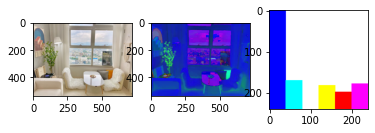

0 0 255
0 255 255
0 255 0
255 255 0
255 0 0
255 0 255


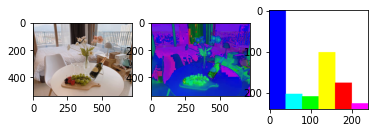

0 0 255
0 255 255
0 255 0
255 255 0
255 0 0
255 0 255


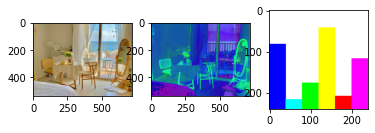

0 0 255
0 255 255
0 255 0
255 255 0
255 0 0
255 0 255


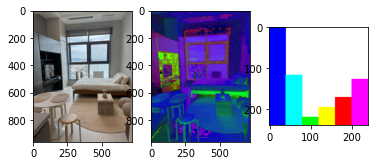

0 0 255
0 255 255
0 255 0
255 255 0
255 0 0
255 0 255


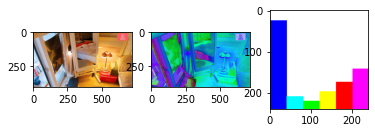

0 0 255
0 255 255
0 255 0
255 255 0
255 0 0
255 0 255


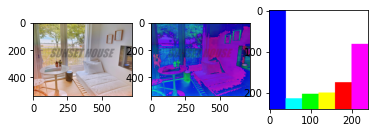

In [9]:
for i in t_list:
    r_img=cv2.imread(f'/Users/hanjun/Desktop/python/비타민/추천시스템/전처리완료 데이터/{i}.jpg') #이미지사이즈 조정
    
    img=cv2.resize(r_img,(240,240)) #이미지사이즈 조정
    cv2.imshow("hist2",img)

    x= 6 #히스토그램 x 값 범위

    img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV) #색 추출을위해 이미지 HSV 색상으로 변경

    img=cv2.calcHist(img,[0],None,[x],[0,180]) #이미지 히스토그램 계산


    imgBuf=np.zeros((x,1,3),dtype="uint8") # 히스토그램 그리기위한 버퍼
    imgHistResult = np.zeros((240,240,3),dtype="uint8") #히스토그램을 그릴 이미지배열
    imgHistResult.fill(255)
    rows,cols, channels = imgHistResult.shape # row,col 값 구하기위함

    for i in range(0,x):
        imgBuf[i,0] = ((i*180/x) , 255,255 ) #버퍼에 지정한 x 만큼의 색상정보를 H 에 저장

    binW= int(cols/x) #색상 히스토그램 너비값

    imgBuf=cv2.cvtColor(imgBuf, cv2.COLOR_HSV2BGR) #HSV 를 BGR로 변환

    for i in range(0, x):


        setY = int(img[i,0]*rows/255) #이미지 y값 을위한 변수

        print(int(imgBuf[i,0][0]),int(imgBuf[i,0][1]),int(imgBuf[i,0][2]))


        cv2.rectangle(imgHistResult, ((i*binW),rows),((i+1)*binW,rows-setY),(int(imgBuf[i,0][0]),int(imgBuf[i,0][1]),int(imgBuf[i,0][2])),-1,8) #히스토그램 색깔별 출력 x에 따라 범위는 다름

    plt.subplot(131)
    rgb = cv2.cvtColor(r_img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)

    plt.subplot(132)
    hsv = cv2.cvtColor(r_img, cv2.COLOR_BGR2HSV)
    plt.imshow(hsv)
    
    
    plt.subplot(133)
    plt.imshow(imgHistResult)
    plt.show()   

In [7]:
i_list = df[df['base_image']=='gangwon_2']['image_index'].to_list()
i_list = ['gangwon_2'] + i_list
i_list

['gangwon_2',
 'jeju_19',
 'jeju_166',
 'gangwon_25',
 'gyeongnam_155',
 'gyeongnam_274']

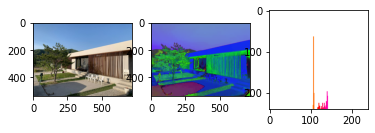

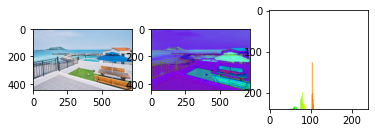

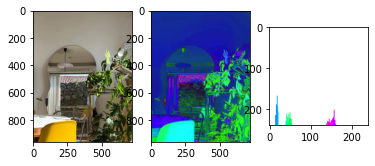

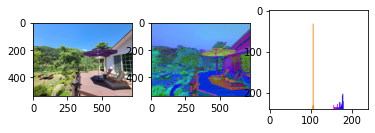

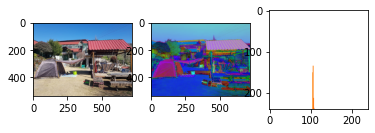

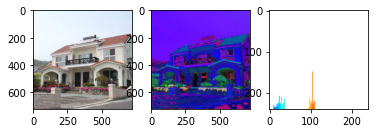

In [12]:
for i in i_list:
    r_img=cv2.imread(f'/Users/hanjun/Desktop/python/비타민/추천시스템/전처리완료 데이터/{i}.jpg') #이미지사이즈 조정
    
    img=cv2.resize(r_img,(240,240)) #이미지사이즈 조정

    x= 180 #히스토그램 x 값 범위

    img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV) #색 추출을위해 이미지 HSV 색상으로 변경

    img=cv2.calcHist(img,[0],None,[x],[0,180]) #이미지 히스토그램 계산


    imgBuf=np.zeros((x,1,3),dtype="uint8") # 히스토그램 그리기위한 버퍼
    imgHistResult = np.zeros((240,240,3),dtype="uint8") #히스토그램을 그릴 이미지배열
    imgHistResult.fill(255)
    rows,cols, channels = imgHistResult.shape # row,col 값 구하기위함

    for i in range(0,x):
        imgBuf[i,0] = ((i*180/x) , 255,255 ) #버퍼에 지정한 x 만큼의 색상정보를 H 에 저장

    binW= int(cols/x) #색상 히스토그램 너비값

    imgBuf=cv2.cvtColor(imgBuf, cv2.COLOR_HSV2BGR) #HSV 를 BGR로 변환

    for i in range(0, x):


        setY = int(img[i,0]*rows/255) #이미지 y값 을위한 변수

        #print(int(imgBuf[i,0][0]),int(imgBuf[i,0][1]),int(imgBuf[i,0][2]))


        cv2.rectangle(imgHistResult, ((i*binW),rows),((i+1)*binW,rows-setY),(int(imgBuf[i,0][0]),int(imgBuf[i,0][1]),int(imgBuf[i,0][2])),-1,8) #히스토그램 색깔별 출력 x에 따라 범위는 다름

    plt.subplot(131)
    rgb = cv2.cvtColor(r_img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)

    plt.subplot(132)
    hsv = cv2.cvtColor(r_img, cv2.COLOR_BGR2HSV)
    plt.imshow(hsv)
    
    
    plt.subplot(133)
    plt.imshow(imgHistResult)
    plt.show()   